<a href="https://colab.research.google.com/github/tejasajja/EuroSAT-ImageClassification/blob/main/EuroSAT_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-check-certificate https://madm.dfki.de/files/sentinel/EuroSAT.zip
!unzip --o EuroSAT.zip

In [2]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.python.keras.models import Sequential
from sklearn.metrics import accuracy_score

In [3]:
import tensorflow as tf

image = tf.io.read_file('/content/2750/Forest/Forest_1.jpg')
image = tf.image.decode_jpeg(image, channels=3)

print("image.shape")
print(image.shape)


image.shape
(64, 64, 3)


In [4]:
img_height = 64
img_width = 64

In [5]:
import os
import shutil
import numpy as np
dataset_dir = '/content/2750/'
categories = os.listdir(dataset_dir)

27000


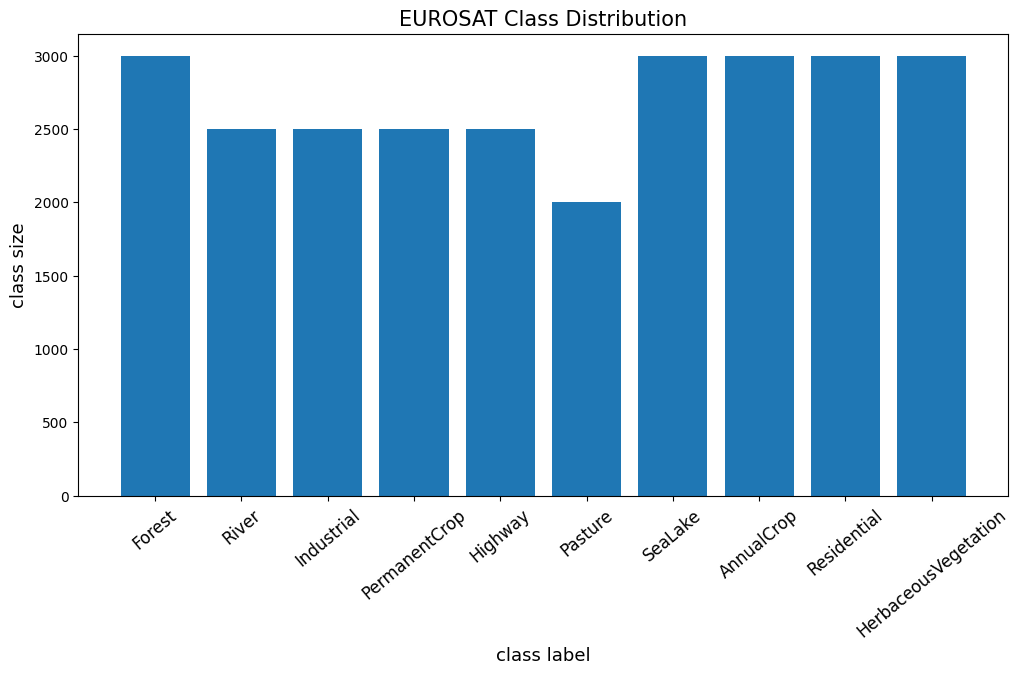

In [6]:

counts = {}

for l in categories:
    counts[l] = len(os.listdir(os.path.join(dataset_dir, l)))


plt.figure(figsize=(12, 6))

plt.bar(range(len(counts)), list(counts.values()), align='center')
plt.xticks(range(len(counts)), list(counts.keys()), fontsize=12, rotation=40)
plt.xlabel('class label', fontsize=13)
plt.ylabel('class size', fontsize=13)
plt.title('EUROSAT Class Distribution', fontsize=15);

total_size = sum(counts.values())
print(total_size)

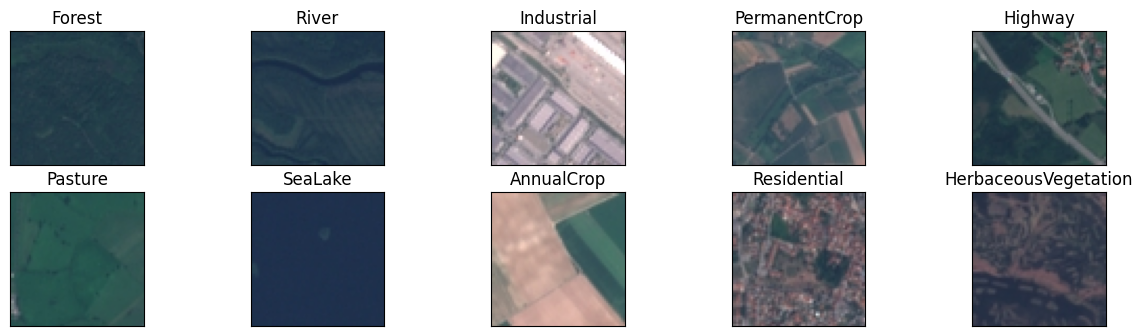

In [7]:
import PIL
import seaborn as sns
import matplotlib.pyplot as plt


img_paths = [os.path.join(dataset_dir, l, l+'_1000.jpg') for l in categories]

def plot_sat_imgs(paths):
    plt.figure(figsize=(15, 8))
    for i in range(len(categories)):
        plt.subplot(4, 5, i+1, xticks=[], yticks=[])
        img = PIL.Image.open(paths[i], 'r')
        plt.imshow(np.asarray(img))
        plt.title(paths[i].split('/')[-2])

plot_sat_imgs(img_paths)

In [8]:
data = {}

for l in categories:
    for img in os.listdir(dataset_dir+'/'+l):
        data.update({os.path.join(dataset_dir, l, img): l})

X = pd.Series(list(data.keys()))
y = pd.get_dummies(pd.Series(data.values()))

In [9]:
y

,AnnualCrop,Forest,HerbaceousVegetation,Highway,Industrial,Pasture,PermanentCrop,Residential,River,SeaLake
0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
26995,0,0,1,0,0,0,0,0,0,0
26996,0,0,1,0,0,0,0,0,0,0
26997,0,0,1,0,0,0,0,0,0,0
26998,0,0,1,0,0,0,0,0,0,0


In [10]:
import os
import shutil
import numpy as np

train_split = 0.7
val_split = 0.15
test_split = 0.15

output_dir = '/content/data'



for split in ['train', 'test', 'valid']:
    split_dir = os.path.join(output_dir, split)
    os.makedirs(split_dir, exist_ok=True)
    for category in categories:
        category_dir = os.path.join(split_dir, category)
        os.makedirs(category_dir, exist_ok=True)

def split_data(category):
    images = os.listdir(os.path.join(dataset_dir, category))
    np.random.shuffle(images)

    train_size = int(len(images) * train_split)
    val_size = int(len(images) * val_split)

    for i, image in enumerate(images):
        if i < train_size:
            split = 'train'
        elif i < train_size + val_size:
            split = 'valid'
        else:
            split = 'test'

        src = os.path.join(dataset_dir, category, image)
        dst = os.path.join(output_dir, split, category, image)
        shutil.copyfile(src, dst)

for category in categories:
    split_data(category)


In [11]:
from keras.preprocessing.image import ImageDataGenerator

train_batches = ImageDataGenerator(rescale=1./255) \
    .flow_from_directory(directory=('/content/data/train'),
                         target_size=(64, 64),
                         class_mode='categorical',
                         classes=categories,
                         color_mode='rgb',
                         batch_size=10,shuffle=True)
valid_batches = ImageDataGenerator(rescale=1./255) \
    .flow_from_directory(directory=('/content/data/valid'),
                         target_size=(64, 64),
                         class_mode='categorical',
                         classes=categories,
                         color_mode='rgb',
                         batch_size=10, shuffle=True)
test_batches = ImageDataGenerator(rescale=1./255) \
    .flow_from_directory(directory=('/content/data/test'),
                         target_size=(64, 64),
                         class_mode='categorical',
                         classes=categories,
                         color_mode='rgb',
                         batch_size=1,shuffle=False)


Found 18900 images belonging to 10 classes.
Found 4050 images belonging to 10 classes.
Found 4050 images belonging to 10 classes.


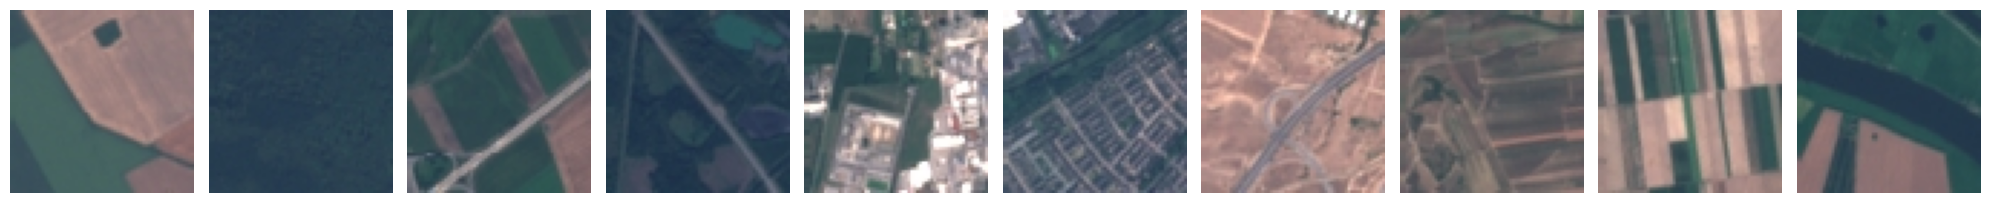

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [12]:
images, labels = next(train_batches)

fig,axes =plt.subplots(1,10,figsize=(20,20))
axes = axes.flatten()
for img,ax in zip(images,axes):
    ax.imshow(img)
    ax.axis('off')
plt.tight_layout()
plt.show()
print((labels[:9]))

#### BaseLine model

In [ ]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Activation,  Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D,MaxPool2D,Dropout

model = Sequential([
    Flatten(input_shape=(64, 64, 3)),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 12288)             0         
                                                                 
 dense (Dense)               (None, 10)                122890    
                                                                 
Total params: 122890 (480.04 KB)
Trainable params: 122890 (480.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1),
 loss='categorical_crossentropy',
 metrics=['accuracy'])

In [ ]:
model.fit(x=train_batches,validation_data=valid_batches,epochs=10,verbose=2)

Epoch 1/10
1890/1890 - 13s - loss: 43.4287 - accuracy: 0.2190 - val_loss: 58.0131 - val_accuracy: 0.1210 - 13s/epoch - 7ms/step
Epoch 2/10
1890/1890 - 11s - loss: 37.0144 - accuracy: 0.2587 - val_loss: 40.8161 - val_accuracy: 0.2701 - 11s/epoch - 6ms/step
Epoch 3/10
1890/1890 - 12s - loss: 34.9536 - accuracy: 0.2720 - val_loss: 31.4175 - val_accuracy: 0.2607 - 12s/epoch - 6ms/step
Epoch 4/10
1890/1890 - 12s - loss: 34.8783 - accuracy: 0.2787 - val_loss: 22.9469 - val_accuracy: 0.3294 - 12s/epoch - 6ms/step
Epoch 5/10
1890/1890 - 12s - loss: 32.8782 - accuracy: 0.2849 - val_loss: 19.8906 - val_accuracy: 0.3178 - 12s/epoch - 6ms/step
Epoch 6/10
1890/1890 - 12s - loss: 33.2374 - accuracy: 0.2876 - val_loss: 39.1751 - val_accuracy: 0.2612 - 12s/epoch - 6ms/step
Epoch 7/10
1890/1890 - 12s - loss: 32.3153 - accuracy: 0.2929 - val_loss: 31.7583 - val_accuracy: 0.3106 - 12s/epoch - 7ms/step
Epoch 8/10
1890/1890 - 12s - loss: 31.7831 - accuracy: 0.2955 - val_loss: 26.1234 - val_accuracy: 0.2795

In [ ]:
predictions = model.predict(test_batches, steps=len(test_batches))

predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_batches.classes

accuracy = accuracy_score(true_classes, predicted_classes)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

4050/4050 [==============================] - 7s 2ms/step
Test Accuracy: 28.42%


### *LeNet*-5 architecture style

In [ ]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Activation,  Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D,MaxPool2D,Dropout,AveragePooling2D

model = Sequential([
    Conv2D(8, kernel_size=(1,1),activation='relu',padding='same', input_shape=(64, 64, 3)),
    AveragePooling2D(pool_size=(2,2),strides=2),
    Conv2D(16,kernel_size=(1,1),activation='relu'),
    AveragePooling2D(pool_size=(2,2),strides=2),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 8)         32        
                                                                 
 average_pooling2d (Average  (None, 32, 32, 8)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 16)        144       
                                                                 
 average_pooling2d_1 (Avera  (None, 16, 16, 16)        0         
 gePooling2D)                                                    
                                                                 
 flatten_1 (Flatten)         (None, 4096)              0         
                                                                 
 dense_1 (Dense)             (None, 120)              

In [ ]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01),
 loss='categorical_crossentropy',
 metrics=['accuracy'])

In [ ]:
model.fit(x=train_batches,validation_data=valid_batches,epochs=10)

Epoch 1/10
1890/1890 - 15s - loss: 1.8493 - accuracy: 0.3008 - val_loss: 1.5984 - val_accuracy: 0.4222 - 15s/epoch - 8ms/step
Epoch 2/10
1890/1890 - 13s - loss: 1.5591 - accuracy: 0.4262 - val_loss: 1.3628 - val_accuracy: 0.5296 - 13s/epoch - 7ms/step
Epoch 3/10
1890/1890 - 13s - loss: 1.3564 - accuracy: 0.5104 - val_loss: 1.2560 - val_accuracy: 0.5709 - 13s/epoch - 7ms/step
Epoch 4/10
1890/1890 - 12s - loss: 1.2316 - accuracy: 0.5574 - val_loss: 1.2356 - val_accuracy: 0.5331 - 12s/epoch - 7ms/step
Epoch 5/10
1890/1890 - 12s - loss: 1.1373 - accuracy: 0.5870 - val_loss: 1.0561 - val_accuracy: 0.6294 - 12s/epoch - 6ms/step
Epoch 6/10
1890/1890 - 12s - loss: 1.0688 - accuracy: 0.6133 - val_loss: 1.1067 - val_accuracy: 0.6037 - 12s/epoch - 6ms/step
Epoch 7/10
1890/1890 - 12s - loss: 1.0107 - accuracy: 0.6333 - val_loss: 1.0187 - val_accuracy: 0.6390 - 12s/epoch - 6ms/step
Epoch 8/10
1890/1890 - 12s - loss: 0.9665 - accuracy: 0.6492 - val_loss: 0.9596 - val_accuracy: 0.6521 - 12s/epoch - 6

In [ ]:
predictions = model.predict(test_batches, steps=len(test_batches))

predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_batches.classes

accuracy = accuracy_score(true_classes, predicted_classes)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

4050/4050 [==============================] - 8s 2ms/step
Test Accuracy: 66.30%


## Model with batch normalizaion

In [ ]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Activation,  Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D,ReLU,MaxPool2D,Dropout,AveragePooling2D

model = Sequential([
    Conv2D(filters=4, kernel_size=(3, 3), strides=(1, 1), padding='same', input_shape=(64, 64, 3)),
    BatchNormalization(),
    ReLU(),
    MaxPooling2D(pool_size=(2,2),strides=2),
    Conv2D(filters=8, kernel_size=(3, 3), strides=(1, 1), padding='same'),
    BatchNormalization(),
    ReLU(),
    MaxPooling2D(pool_size=(2,2),strides=2),
    Flatten(),
    Dense(32, activation='relu'),
    layers.Dropout(0.5),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 64, 64, 4)         112       
                                                                 
 batch_normalization_4 (Bat  (None, 64, 64, 4)         16        
 chNormalization)                                                
                                                                 
 re_lu_4 (ReLU)              (None, 64, 64, 4)         0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 32, 32, 4)         0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 8)         296       
                                                                 
 batch_normalization_5 (Bat  (None, 32, 32, 8)        

In [ ]:
model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.001, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.fit(x=train_batches,validation_data=valid_batches,epochs=25)

Epoch 1/25
1890/1890 [==============================] - 15s 7ms/step - loss: 1.6038 - accuracy: 0.4084 - val_loss: 1.3102 - val_accuracy: 0.5541
Epoch 2/25
1890/1890 [==============================] - 15s 8ms/step - loss: 1.5219 - accuracy: 0.4414 - val_loss: 1.2617 - val_accuracy: 0.5753
Epoch 3/25
1890/1890 [==============================] - 14s 8ms/step - loss: 1.4675 - accuracy: 0.4627 - val_loss: 1.1590 - val_accuracy: 0.5995
Epoch 4/25
1890/1890 [==============================] - 14s 8ms/step - loss: 1.4083 - accuracy: 0.4809 - val_loss: 1.1234 - val_accuracy: 0.6119
Epoch 5/25
1890/1890 [==============================] - 14s 7ms/step - loss: 1.3574 - accuracy: 0.5019 - val_loss: 1.0679 - val_accuracy: 0.6321
Epoch 6/25
1890/1890 [==============================] - 14s 7ms/step - loss: 1.3209 - accuracy: 0.5143 - val_loss: 1.0817 - val_accuracy: 0.6279
Epoch 7/25
1890/1890 [==============================] - 14s 7ms/step - loss: 1.2765 - accuracy: 0.5289 - val_loss: 0.9919 - val_ac

In [ ]:
predictions = model.predict(test_batches, steps=len(test_batches))
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_batches.classes
accuracy = accuracy_score(true_classes, predicted_classes)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

4050/4050 [==============================] - 9s 2ms/step
Test Accuracy: 73.09%


## Model with arcitecture similar to AlexNEt

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, MaxPool2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(filters=64, kernel_size=(5,5), strides=(1,1), activation='relu', padding='same', input_shape=(64,64,3)),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2), strides=2),

    Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2), strides=2),

    Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),

    Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),

    Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2), strides=2),

    Flatten(),

    Dense(1024, activation='relu'),
    Dropout(0.5),

    Dense(512, activation='relu'),
    Dropout(0.5),

    Dense(10, activation='softmax')
])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 64, 64, 64)        4864      
                                                                 
 batch_normalization_5 (Bat  (None, 64, 64, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 batch_normalization_6 (Bat  (None, 32, 32, 128)       512       
 chNormalization)                                                
                                                      

In [15]:
model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [16]:
model.fit(x=train_batches,validation_data=valid_batches,epochs=20)

Epoch 1/25
1890/1890 [==============================] - 30s 13ms/step - loss: 1.8852 - accuracy: 0.4122 - val_loss: 2.9651 - val_accuracy: 0.2452
Epoch 2/25
1890/1890 [==============================] - 25s 13ms/step - loss: 1.2102 - accuracy: 0.5767 - val_loss: 1.0628 - val_accuracy: 0.6491
Epoch 3/25
1890/1890 [==============================] - 25s 13ms/step - loss: 1.0250 - accuracy: 0.6453 - val_loss: 1.7883 - val_accuracy: 0.4691
Epoch 4/25
1890/1890 [==============================] - 24s 13ms/step - loss: 0.8732 - accuracy: 0.7009 - val_loss: 1.4794 - val_accuracy: 0.5217
Epoch 5/25
1890/1890 [==============================] - 25s 13ms/step - loss: 0.7802 - accuracy: 0.7367 - val_loss: 0.8704 - val_accuracy: 0.7072
Epoch 6/25
1890/1890 [==============================] - 24s 13ms/step - loss: 0.6905 - accuracy: 0.7655 - val_loss: 0.7644 - val_accuracy: 0.7314
Epoch 7/25
1890/1890 [==============================] - 25s 13ms/step - loss: 0.6196 - accuracy: 0.7938 - val_loss: 2.9083 -

In [17]:
predictions = model.predict(test_batches, steps=len(test_batches))
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_batches.classes
accuracy = accuracy_score(true_classes, predicted_classes)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

4050/4050 [==============================] - 9s 2ms/step
Test Accuracy: 89.43%





### VGG architecture




In [30]:
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, MaxPool2D, Flatten, Dense, Dropout

model = Sequential([

    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), strides=(2, 2)),


    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), strides=(2, 2)),


    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), strides=(2, 2)),


    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), strides=(2, 2)),


    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), strides=(2, 2)),


    Flatten(),
    Dense(4096, activation='relu'),
    Dense(4096, activation='relu'),
    Dense(10, activation='softmax')  # Assuming 1000 classes as in the original VGG16
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_49 (Conv2D)          (None, 64, 64, 64)        1792      
                                                                 
 conv2d_50 (Conv2D)          (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 32, 32, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_51 (Conv2D)          (None, 32, 32, 128)       73856     
                                                                 
 conv2d_52 (Conv2D)          (None, 32, 32, 128)       147584    
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 16, 16, 128)       0         
 ng2D)                                                

In [31]:
model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [32]:
model.fit(x=train_batches,validation_data=valid_batches,epochs=10)

Epoch 1/10
1890/1890 [==============================] - 69s 36ms/step - loss: 2.0592 - accuracy: 0.2089 - val_loss: 1.7318 - val_accuracy: 0.3104
Epoch 2/10
1890/1890 [==============================] - 67s 36ms/step - loss: 1.6131 - accuracy: 0.3500 - val_loss: 1.3963 - val_accuracy: 0.4440
Epoch 3/10
1890/1890 [==============================] - 67s 36ms/step - loss: 1.2623 - accuracy: 0.5326 - val_loss: 0.9629 - val_accuracy: 0.6474
Epoch 4/10
1890/1890 [==============================] - 67s 36ms/step - loss: 0.9696 - accuracy: 0.6464 - val_loss: 0.7912 - val_accuracy: 0.7207
Epoch 5/10
1890/1890 [==============================] - 67s 36ms/step - loss: 0.8139 - accuracy: 0.7071 - val_loss: 1.0075 - val_accuracy: 0.6365
Epoch 6/10
1890/1890 [==============================] - 67s 36ms/step - loss: 0.7082 - accuracy: 0.7441 - val_loss: 0.6763 - val_accuracy: 0.7565
Epoch 7/10
1890/1890 [==============================] - 67s 36ms/step - loss: 0.6200 - accuracy: 0.7764 - val_loss: 0.6129 -

In [33]:
predictions = model.predict(test_batches, steps=len(test_batches))
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_batches.classes
accuracy = accuracy_score(true_classes, predicted_classes)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

4050/4050 [==============================] - 18s 4ms/step
Test Accuracy: 80.44%
